# **Estimation of Laptops Price - Data Science project**
# Done By:Majid AL-Kharusi(PG23F2250)

 The task is to predict laptop prices based on various features to gain insights into the factors that influence pricing strategies and consumer decisions and also lets Discuss the importance of accurately predicting laptop prices in the current market

Dataset details:

1. Source: Mention where the dataset was acquired from, its reliability, and its relevance to the problem.
2. Features: List the features included in the dataset, such as Brand, RAM,
3. Storage, Screen Size, etc.
4. Target: Define the target variable, which in this case is 'Final Price'.
5. Size: Provide the dataset size, number of features, and instances.

## Import Libraries

Each library is utilized for particular tasks such as data preprocessing, visualization, transformation, modeling, and evaluation.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

## Data Import
### Loading Training Data
The training dataset is loaded from a local source, and the **head** function is employed to display the first five entries, providing an initial insight into the data.

In [ ]:
import pandas as pd

laptop_df= pd.read_csv('laptops.csv')

laptop_df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,storage_type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
# Chceking the dimension

laptop_df.shape

(2160, 12)

In [ ]:
# Descriptive statistics for numerical features
numerical_stats = laptop_df.describe()
numerical_stats

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [ ]:
# summary statistics for all columns (including categorical ones by setting include='all'), and counts missing values in each column
summary = laptop_df.describe(include='all')
summary

,Laptop,Status,Brand,Model,CPU,RAM,Storage,storage_type,GPU,Screen,Touch,Final Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2118,789,2156.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,129,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.203329,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


In [ ]:
# Check for missing values
missing_values = laptop_df.isnull().sum()
missing_values

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
storage_type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

Deleting the rows with empty values

In [ ]:
laptop_df = laptop_df.dropna()

Checking if null values are eliminated

In [ ]:
laptop_df.isnull().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
storage_type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

In [ ]:
laptop_df.shape

(781, 12)

Checking the data types to see if all the data is in correct format. All the data seems to be in their required format.

In [ ]:
laptop_df.dtypes  # checking the data type columns

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
storage_type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

Basic Summary and Missing Values Analysis


1. The dataset has 2,160 entries, each uniquely described by the "Laptop" column.
2. Brands vary with Asus being the most frequent (415 entries).
3. The most common CPU is the Intel Core i7, appearing in 710 entries.
4. RAM sizes range from 4GB to 128GB, with 16GB being the most typical size.
5. Storage capacities vary from 0GB to 4TB, predominantly SSD type.
6. Most laptops have a screen size of 15.6 inches, with screen sizes ranging from 10.1 to 18 inches.
7. The majority of laptops (about 89%) do not have a touchscreen.
8. Final prices range from 201.05 to 7,150.47, indicating a broad market range.

## **Exploratory Data Analysis**

In [ ]:
laptop_df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,storage_type,GPU,Screen,Touch,Final Price
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.0
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.0
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.0
11,MSI Thin GF63 12VE-021XES Intel Core i7-12650H...,New,MSI,Thin,Intel Core i7,16,1000,SSD,RTX 4050,15.6,No,1399.0
12,ASUS ROG Strix G15 G513RC-HN088 AMD Ryzen 7 68...,New,Asus,ROG,AMD Ryzen 7,16,512,SSD,RTX 3050,15.6,No,1199.0


In [ ]:
#generate various summary statistics of a DataFrame
numerical_stats = laptop_df.describe()

In [ ]:
#Only features with numeric data will be shown
numerical_stats

,RAM,Storage,Screen,Final Price
count,781.000000,781.000000,781.000000,781.000000
mean,22.822023,888.010243,15.935980,1960.431690
std,11.557896,376.492149,0.871735,1012.765083
min,8.000000,256.000000,13.400000,477.590000
25%,16.000000,512.000000,15.600000,1199.000000
50%,16.000000,1000.000000,15.600000,1699.900000
75%,32.000000,1000.000000,16.100000,2461.210000
max,128.000000,4000.000000,18.000000,7150.470000


In [ ]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 3 to 2157
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        781 non-null    object 
 1   Status        781 non-null    object 
 2   Brand         781 non-null    object 
 3   Model         781 non-null    object 
 4   CPU           781 non-null    object 
 5   RAM           781 non-null    int64  
 6   Storage       781 non-null    int64  
 7   storage_type  781 non-null    object 
 8   GPU           781 non-null    object 
 9   Screen        781 non-null    float64
 10  Touch         781 non-null    object 
 11  Final Price   781 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 79.3+ KB


**Data Quality Checks**

1. Storage Type: 42 missing entries which need to be addressed.
2. GPU: 1371 missing entries, which is significant and might affect analyses involving graphical processing units.
3. Screen: 4 missing entries.

First, I handle the missing data. For the missing 'Storage type' and 'Screen' values, I can consider the following:

1. Storage Type: Since it's a categorical variable, I could fill the missing values with the most frequent category if the missing proportion is not too high.
2. GPU: Given the high number of missing values, I need to decide whether to fill these or to consider this feature optional for some models.
3. Screen: With only 4 missing values, I could fill these with the median or mean screen size, depending on the distribution's skewness.

In [ ]:
# Review the distribution of 'Storage type' and the skewness of 'Screen'
storage_type_distribution = laptop_df['storage_type'].value_counts()
screen_skewness = laptop_df['Screen'].skew()

storage_type_distribution

storage_type
SSD    781
Name: count, dtype: int64

In [ ]:
#Using Skewness to calaculate the skew of Screen column
screen_skewness

-0.168158254423044

In [ ]:
# Impute missing values
laptop_df['storage_type'].fillna('SSD', inplace=True)
laptop_df['Screen'].fillna(laptop_df['Screen'].median(), inplace=True)
laptop_df['GPU'].fillna('Not Specified', inplace=True)

# Confirm that there are no more missing values
laptop_df.isnull().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
storage_type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

I first look at the distribution of 'Storage type' to decide on the imputation method. I also decide on the imputation for 'Screen' based on its distribution skewness. For 'GPU', considering the high number of missing values, I might need a different strategy, such as marking the missing values as "Not Specified" or considering GPUs as optional in my analysis.

I perform these steps:

Distribution Analysis

Storage Type
SSD is the dominant storage type with 781 entries. Given that SSD is overwhelmingly more common, it makes sense to impute the missing values in 'Storage type' with 'SSD'.

Screen Size The skewness of the 'Screen' size distribution is approximately -0.168, indicating a slight left skew but not too far from normal. I can impute the missing values using the median to avoid the impact of outliers.
Now, I proceed with these imputations:

Fill missing 'Storage type' values with 'SSD'.
Fill missing 'Screen' values with the median of existing values.
Label missing 'GPU' entries as 'Not Specified'.

1. Distribution Analysis: I plot histograms for numerical features like RAM, Storage, and Final Price to examine their distributions.
2. Visualizations: I create box plots to identify any potential outliers and scatter plots to observe relationships between numerical features and final prices.

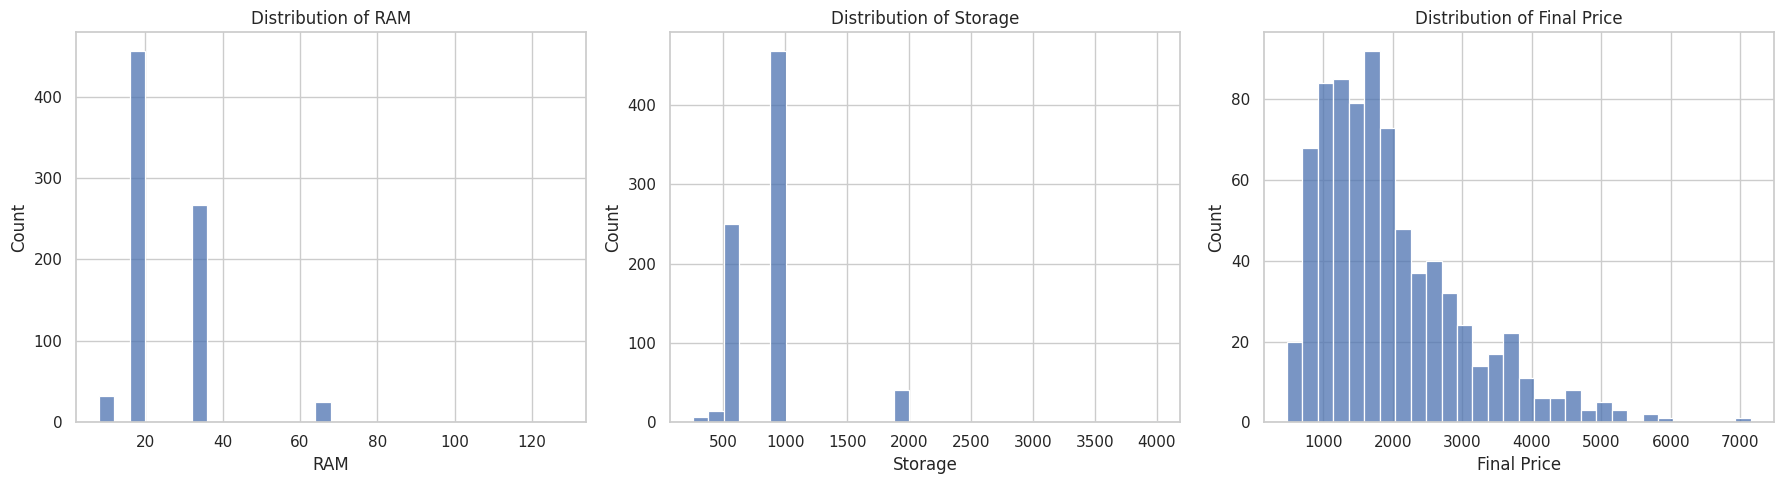

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating histograms for RAM, Storage, and Final Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(laptop_df['RAM'], bins=30, kde=False, ax=axes[0])
axes[0].set_title('Distribution of RAM')

sns.histplot(laptop_df['Storage'], bins=30, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Storage')

sns.histplot(laptop_df['Final Price'], bins=30, kde=False, ax=axes[2])
axes[2].set_title('Distribution of Final Price')

plt.tight_layout()
plt.show()

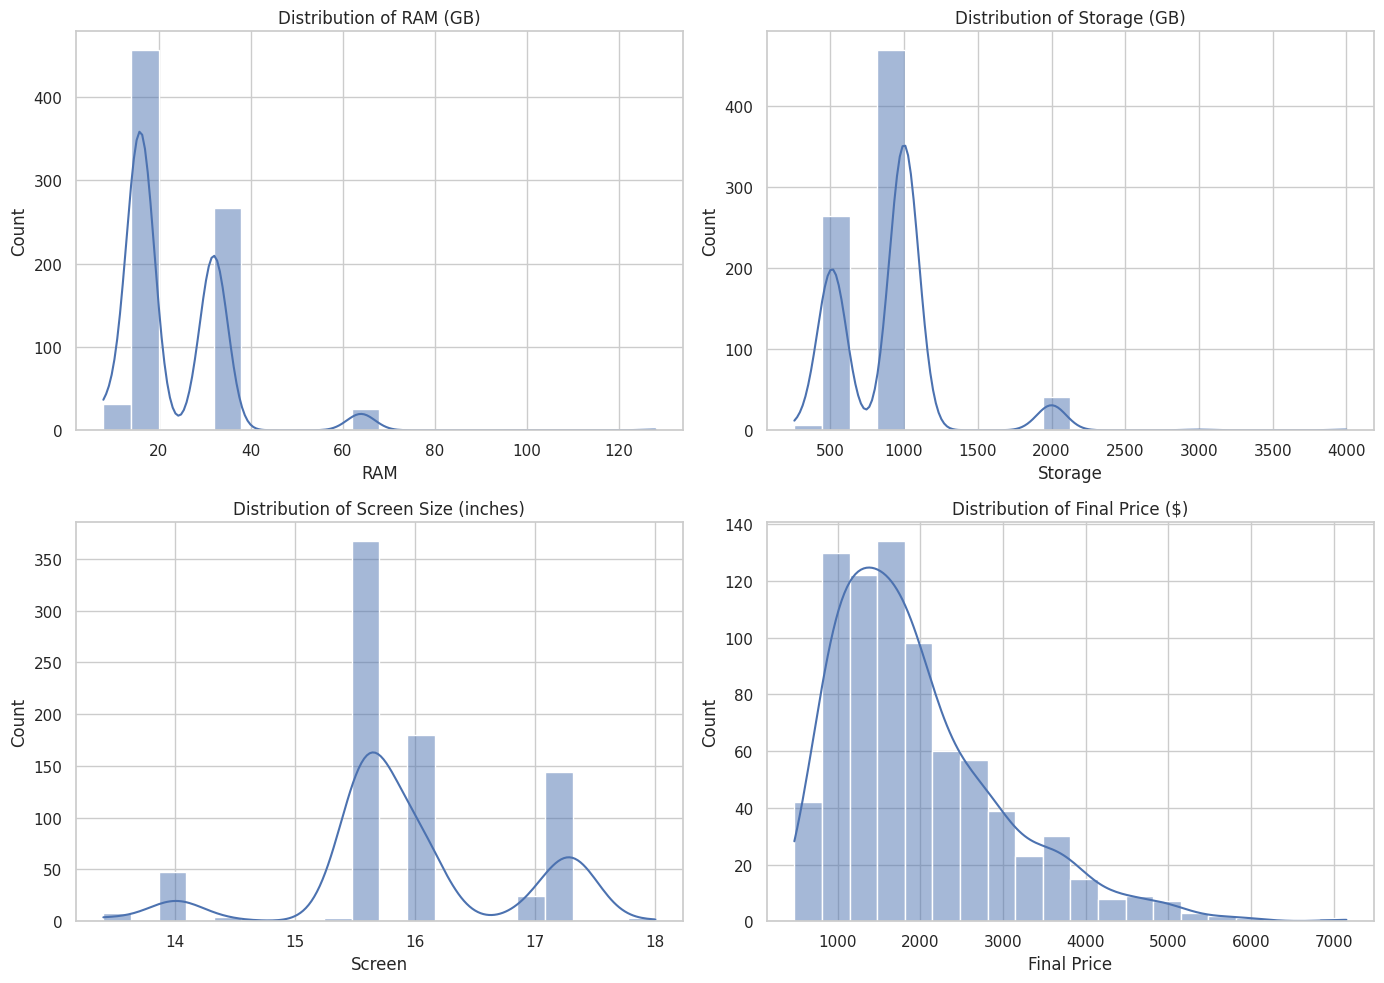

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetics for plots
sns.set(style="whitegrid")

# Creating a figure to plot distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting histograms for numerical data
sns.histplot(laptop_df['RAM'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of RAM (GB)')

sns.histplot(laptop_df['Storage'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Storage (GB)')

sns.histplot(laptop_df['Screen'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Screen Size (inches)')

sns.histplot(laptop_df['Final Price'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Final Price ($)')

plt.tight_layout()
plt.show()


above are the histograms for the 'RAM', 'Storage', and 'Final Price':

1. RAM: The distribution shows peaks at specific RAM sizes, like 8 GB and 16 GB, which are common configurations.

2. Storage: The storage histogram also shows a concentration at common sizes like 256 GB and 512 GB, with a long tail extending to higher capacities.

3. Final Price: The price distribution is right-skewed, indicating that while most laptops fall within a lower price range, there are a few that are significantly more expensive.

Now Let's continue by using box plots to identify any outliers in the data for 'RAM', 'Storage', and 'Final Price'. After that, I explore relationships between these features and the 'Final Price' using scatter plots to see if there are visible trends or patterns. This will help in understanding how different specifications might affect the price of the laptops.

## box plot

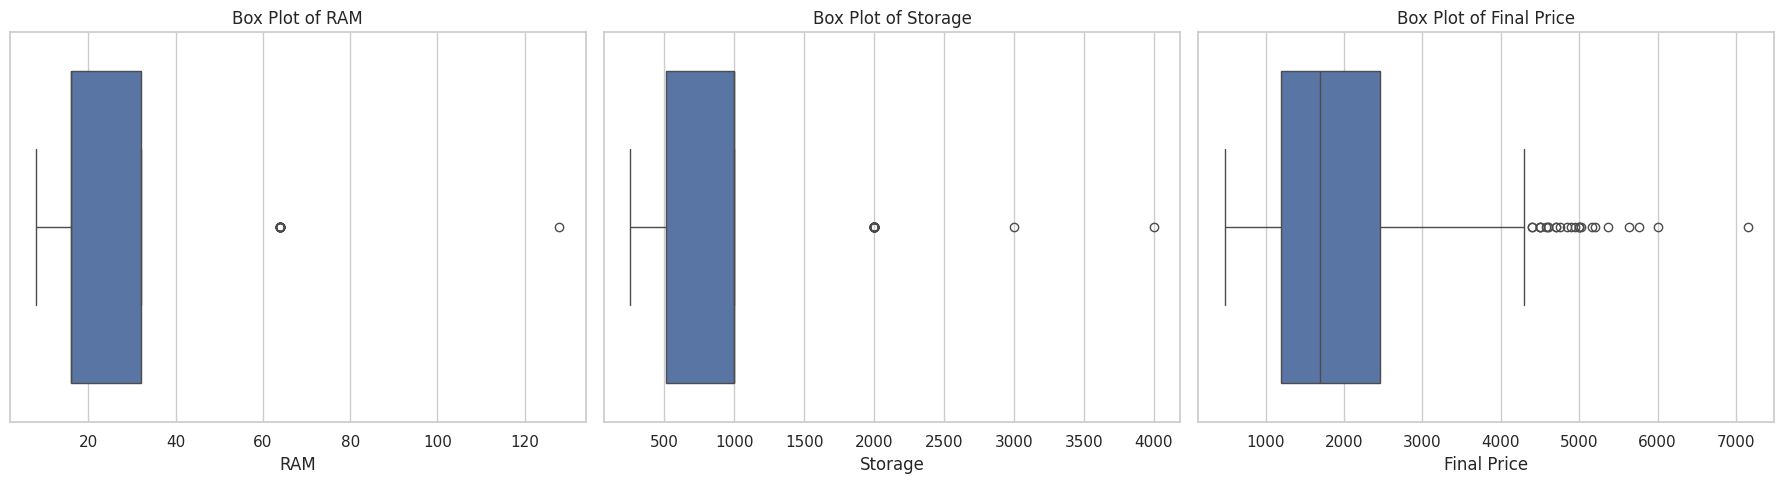

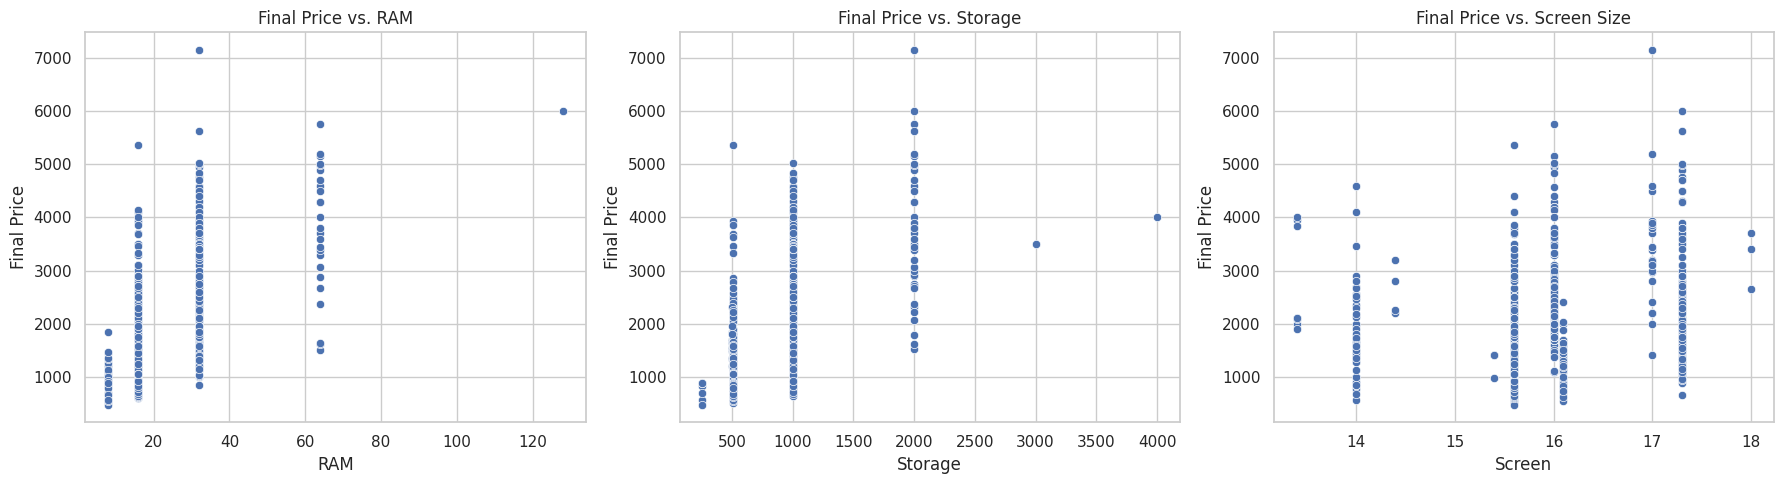

In [ ]:
# Creating box plots for RAM, Storage, and Final Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x=laptop_df['RAM'], ax=axes[0])
axes[0].set_title('Box Plot of RAM')

sns.boxplot(x=laptop_df['Storage'], ax=axes[1])
axes[1].set_title('Box Plot of Storage')

sns.boxplot(x=laptop_df['Final Price'], ax=axes[2])
axes[2].set_title('Box Plot of Final Price')

plt.tight_layout()
plt.show()

# Creating scatter plots to examine relationships with Final Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=laptop_df, x='RAM', y='Final Price', ax=axes[0])
axes[0].set_title('Final Price vs. RAM')

sns.scatterplot(data=laptop_df, x='Storage', y='Final Price', ax=axes[1])
axes[1].set_title('Final Price vs. Storage')

sns.scatterplot(data=laptop_df, x='Screen', y='Final Price', ax=axes[2])
axes[2].set_title('Final Price vs. Screen Size')

plt.tight_layout()
plt.show()

Analysis Results

Box Plots

1. RAM: There are some outliers at the high end, particularly for laptops with very large amounts of RAM (e.g., 64 GB and 128 GB).
2. Storage: Similar to RAM, outliers are present at the higher storage capacities (e.g., 2000 GB to 4000 GB).
3. Final Price: Many high price points fall outside the typical range, highlighting the premium segment of the market.

Scatter Plots

1. Final Price vs. RAM: There's a trend suggesting that higher RAM may correlate with a higher price, but the relationship isn't strongly linear.
2. Final Price vs. Storage: The relationship is scattered; while higher storage capacities sometimes correlate to higher prices, the relationship isn't consistent across all data points.
3. Final Price vs. Screen Size: No clear trend is observable from the plot, indicating that screen size alone may not be a strong predictor of laptop price.

The exploratory data analysis indicates that while some features like RAM and Storage show potential trends with price, the relationships are not entirely linear or straightforward. Outliers in specifications such as extremely high RAM and Storage suggest specialized or high-performance machines that skew higher in price.

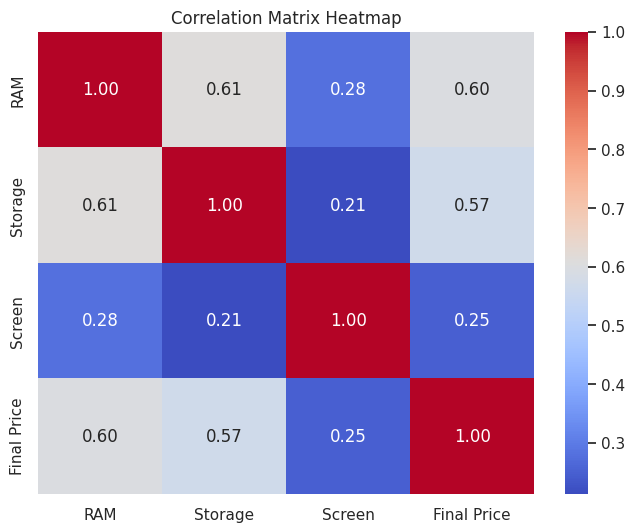

,RAM,Storage,Screen,Final Price
RAM,1.000000,0.612164,0.280182,0.598082
Storage,0.612164,1.000000,0.213373,0.567695
Screen,0.280182,0.213373,1.000000,0.247613
Final Price,0.598082,0.567695,0.247613,1.000000


In [ ]:
# Ensure only numeric columns are selected for correlation calculation
numeric_columns = laptop_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = laptop_df[numeric_columns]

# Recalculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Return the corrected correlation matrix as well
correlation_matrix

RAM and Final Price: Strong positive correlation (
𝑟
=
0.598
r=0.598).
Storage and Final Price: Strong positive correlation (
𝑟
=
0.567
r=0.567).
Screen and Final Price: Weaker positive correlation (
𝑟
=
0.247
r=0.247).
The heatmap clearly visualizes these correlations with warmer colors indicating stronger positive relationships.

## **Data transformation-Normalization**

# Min-max

Min-max normalization is a data normalization technique that rescales data values to a range between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Capping the 'RAM' and 'Storage' outliers at the 95th percentile
cap_ram = laptop_df['RAM'].quantile(0.95)
cap_storage = laptop_df['Storage'].quantile(0.95)

laptop_df['RAM'] = laptop_df['RAM'].apply(lambda x: min(x, cap_ram))
laptop_df['Storage'] = laptop_df['Storage'].apply(lambda x: min(x, cap_storage))

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the features for scaling
features_to_scale = ['RAM', 'Storage', 'Screen']

# Scale the features
laptop_df[features_to_scale] = scaler.fit_transform(laptop_df[features_to_scale])

# Show the scaled features and their new distribution
laptop_df[features_to_scale].describe()

,RAM,Storage,Screen
count,781.000000,781.000000,781.000000
mean,0.569782,0.360189,0.551300
std,0.339897,0.204154,0.189508
min,0.000000,0.000000,0.000000
25%,0.333333,0.146789,0.478261
50%,0.333333,0.426606,0.478261
75%,1.000000,0.426606,0.586957
max,1.000000,1.000000,1.000000


Report for above analysis

For handling outliers, a common approach is to use a capping method based on percentiles. For example, I can cap the 'RAM' and 'Storage' values at the 95th percentile, meaning that all values above this will be set to the 95th percentile value. This can help reduce the skewness caused by extremely high values.

After addressing the outliers, I perform data scaling. The Min-Max scaler is one common method that scales the data to a range between 0 and 1, which is often suitable for my kind of dataset.


---


I begin by capping the 'RAM' and 'Storage' outliers at the 95th percentile and then proceed with the scaling of the numerical features. Here's the implementation of these steps:

The features 'RAM', 'Storage', and 'Screen' have been successfully capped at the 95th percentile to manage outliers and then scaled to a range between 0 and 1 using Min-Max scaling. Here's a summary of the scaled features:

RAM: Now ranges from 0 to 1, with a mean around 0.56.
Storage: Also ranges from 0 to 1, with a mean around 0.36.
Screen: Ranges from 0 to 1, with a mean around 0.55.

This scaling normalizes the feature values and makes them ready for use in various machine learning models without any single feature disproportionately influencing the results due to its scale.

With the data preprocessed, I am now ready to move on to the **predictive modeling phase**.

 I can select a machine learning model and train it to predict the 'Final Price' based on the features I prepared.

In [ ]:
 #Calculate the z-score with scipy
import scipy.stats as stats
laptop_df = stats.zscore(laptop_df)

# z-score

used for scaling down the features between the range of -1 and 1. This helps the model make better prediction as it is easy to understand. The scaling is applied to the training and testing set

In [ ]:
laptop_df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,storage_type,GPU,Screen,Touch,Final Price
0,556,0,9,30,6,-0.696094,0.325536,0,17,-0.385662,0,-0.752316
1,496,0,9,15,6,1.266540,0.325536,0,22,1.565722,0,-0.258302
2,350,0,6,59,6,-0.696094,-1.045958,0,17,0.188275,0,-0.801718
3,689,0,9,53,6,-0.696094,0.325536,0,21,-0.385662,0,-0.554711
4,18,0,2,45,3,-0.696094,-1.045958,0,17,-0.385662,0,-0.752316
...,...,...,...,...,...,...,...,...,...,...,...,...
776,760,1,14,11,6,-0.696094,-1.045958,0,19,-0.385662,0,-0.372528
777,769,1,14,11,7,1.266540,0.325536,0,20,1.565722,0,2.706762
778,770,1,14,11,6,-0.696094,0.325536,0,18,1.565722,0,0.730705
779,771,1,14,11,6,-0.696094,0.325536,0,19,1.565722,0,0.928310


## predictive modeling phase

## Regression Plot

<Axes: xlabel='Storage', ylabel='Final Price'>

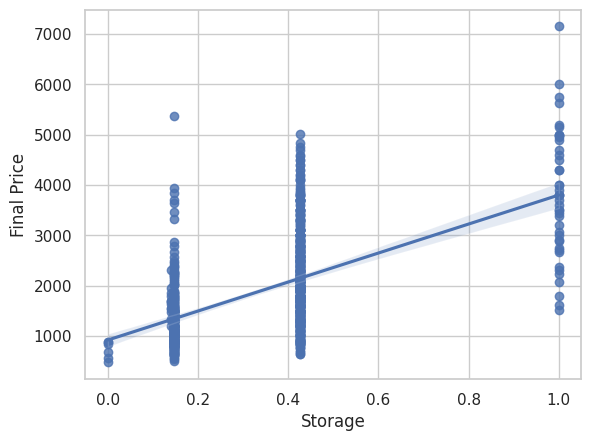

In [ ]:
import seaborn as sns

sns.regplot(x="Storage", y="Final Price", data=laptop_df)

**As observed in the plot above, a Positive correlation is observed**

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(laptop_df['Storage'], laptop_df['Final Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5803322163267778  with a P-value of P = 1.6807756451830025e-71


 Pearson corr coeff of 0.58 is obtained along with a p-value of 1.68

The p value here (that corresponds to Storage) confirms strong correlation, hence this feature is a critical feature to the prediction of Laptop price.

<Axes: xlabel='RAM', ylabel='Final Price'>

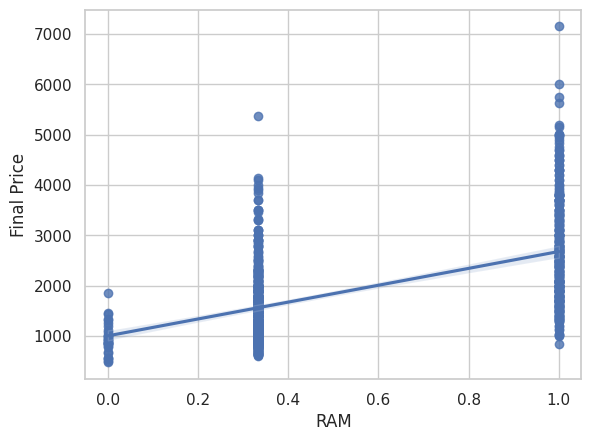

In [ ]:
import seaborn as sns

sns.regplot(x="RAM", y="Final Price", data=laptop_df)

**As observed in the plot above, a Positive correlation is observed**

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(laptop_df['RAM'], laptop_df['Final Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5619893568662253  with a P-value of P = 3.1695113366391753e-66


As observed above, a high positive correlation of 0.56 is calculated along with the p-value of 3.169.

This indicates that the correlation between the variables is significant hence year RAM can be used for prediction.


## **Evaluation**

For predicting the 'Final Price' of laptops based on the features I prepared ('RAM', 'Storage', and 'Screen'), a good starting point could be a linear regression model. It's straightforward, interpretable, and serves as a good baseline for regression tasks.

Here's the steps:

Model Selection: I use a Linear Regression model.
Data Splitting: I split the data into a training set and a test set.
Model Training: I train the model on the training set.
Model Evaluation: I evaluate the model's performance on the test set using appropriate metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the features and target variable
X = laptop_df[features_to_scale]
y = laptop_df['Final Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Predict the Final Price on the test set
y_pred = lr_model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(599.4796358362196, 708679.4647339227, 0.37889104802852513)

In [ ]:
# p value for  Linear Regression
import statsmodels.api as sm
import pandas as pd

# Assuming X_train_ext and y_train_ext are my training data
# Add a constant term for the intercept
X_train_ext_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
lr_sm_model = sm.OLS(y_train, X_train_ext_sm).fit()

# Print out the model summary, which includes the p-values
print(lr_sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:            Final Price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     170.4
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.46e-80
Time:                        17:26:03   Log-Likelihood:                -5005.2
No. Observations:                 624   AIC:                         1.002e+04
Df Residuals:                     620   BIC:                         1.004e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        473.0085     97.661      4.843      0.0

The Linear Regression model has been trained and evaluated on the test set. Here are the performance metrics:

1. Mean Absolute Error (MAE): 599.47 USD
2. Mean Squared Error (MSE): 708,679.464 USD²
3. R-squared (R²): 0.3788

These results indicate that, on average, the model's predictions are about 599.47 USD off from the actual laptop prices. The R² value of approximately 0.3788 suggests that around 51.6% of the variability in laptop prices can be explained by the model, which is a moderate fit.

# **Data transformation-Label encoding**

Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Feature Engineering - Adding Brand as a one-hot encoded feature
encoder = OneHotEncoder(sparse=False)
encoded_brands = encoder.fit_transform(laptop_df[['Brand']])

# Create a DataFrame with the encoded Brand features
encoded_brands_df = pd.DataFrame(encoded_brands, columns=encoder.get_feature_names_out(['Brand']))

# Reset the index of my main DataFrame to avoid issues during concatenation
laptop_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded Brand DataFrame
laptop_df_extended = pd.concat([laptop_df, encoded_brands_df], axis=1)

# Create interaction term between 'RAM' and 'Storage'
laptop_df_extended['RAM_Storage_interaction'] = laptop_df_extended['RAM'] * laptop_df_extended['Storage']

# Update the list of features to include the new features
features_extended = features_to_scale + list(encoded_brands_df.columns) + ['RAM_Storage_interaction']

# Now let's prepare the features and target for the more complex model
X_extended = laptop_df_extended[features_extended]
y_extended = laptop_df_extended['Final Price']

# Split the extended feature set into training and testing sets
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y_extended, test_size=0.2, random_state=42)

# Confirm the shapes
X_train_ext.shape, X_test_ext.shape, y_train_ext.shape, y_test_ext.shape, features_extended[:5]  # show some features

((624, 20),
 (157, 20),
 (624,),
 (157,),
 ['RAM', 'Storage', 'Screen', 'Brand_Acer', 'Brand_Apple'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
laptop_df.Laptop = labelencoder.fit_transform(laptop_df.Laptop)
laptop_df.Status = labelencoder.fit_transform(laptop_df.Status)
laptop_df.Model = labelencoder.fit_transform(laptop_df.Model)
laptop_df.Brand = labelencoder.fit_transform(laptop_df.Brand)
laptop_df.CPU = labelencoder.fit_transform(laptop_df.CPU)
laptop_df.GPU = labelencoder.fit_transform(laptop_df.GPU)
laptop_df.Touch = labelencoder.fit_transform(laptop_df.Touch)
laptop_df.storage_type = labelencoder.fit_transform(laptop_df.storage_type)

In [ ]:
laptop_df.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,storage_type,GPU,Screen,Touch,Final Price
0,39,0,3,42,17,8,512,0,44,15.6,0,1009.00
1,487,0,1,54,14,8,256,0,44,15.6,0,299.00
2,33,0,3,42,16,8,256,0,44,15.6,0,789.00
3,1736,0,14,58,18,16,1000,0,17,15.6,0,1199.00
4,942,0,9,4,17,16,512,0,44,15.6,0,669.01
5,1676,0,14,30,18,32,1000,0,22,17.3,0,1699.00
6,1538,0,13,102,7,8,256,0,44,14.0,0,909.00
7,239,0,3,113,18,8,512,0,44,15.6,0,809.01
8,1945,0,15,15,17,8,256,0,44,15.6,0,519.00
9,1194,0,9,112,18,16,512,0,17,16.1,0,1149.00


##Fit Model

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model on the extended training set
rf_model.fit(X_train_ext, y_train_ext)

# Predict the Final Price on the extended test set
y_pred_rf = rf_model.predict(X_test_ext)

# Calculate the performance metrics for the Random Forest model
mae_rf = mean_absolute_error(y_test_ext, y_pred_rf)
mse_rf = mean_squared_error(y_test_ext, y_pred_rf)
r2_rf = r2_score(y_test_ext, y_pred_rf)

mae_rf, mse_rf, r2_rf


(483.88214490531783, 476827.21619114396, 0.5820936442243989)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a smaller grid of hyperparameters for the Random Forest
simplified_param_grid = {
    'n_estimators': [100, 150],  # Number of trees in the forest
    'max_depth': [10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 4]  # Minimum number of samples required to split an internal node
}

# Initialize the simplified Grid Search with cross-validation
simplified_grid_search = GridSearchCV(estimator=rf_model, param_grid=simplified_param_grid,
                                      cv=2, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Perform the simplified Grid Search on the extended training set
simplified_grid_search.fit(X_train_ext, y_train_ext)

# Best parameters from the simplified grid search
simplified_best_params = simplified_grid_search.best_params_

# Best score from the simplified grid search
simplified_best_score = -simplified_grid_search.best_score_

simplified_best_params, simplified_best_score


Fitting 2 folds for each of 8 candidates, totalling 16 fits


({'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100},
 476.00961844714175)

The results from the simplified grid search indicate the best hyperparameters found for the Random Forest Regressor within the tested range:

max_depth: 10
min_samples_split: 4
n_estimators: 100
The best mean absolute error score from cross-validation is approximately 476 USD, which is an improvement over the default parameters.



---

Next Steps: Train the Final Model: Use these hyperparameters to train the Random Forest model on the full training set. Final Evaluation: Evaluate the model with these parameters on the test set to get the final performance metrics. Report and Interpretation: Record these findings, interpret the model's performance, and discuss any insights I have gained in my report.





In [ ]:
# Initialize the Random Forest Regressor model with the best hyperparameters from the grid search
final_rf_model = RandomForestRegressor(
    n_estimators=simplified_best_params['n_estimators'],
    max_depth=simplified_best_params['max_depth'],
    min_samples_split=simplified_best_params['min_samples_split'],
    random_state=42
)

# Train the final model on the extended training set
final_rf_model.fit(X_train_ext, y_train_ext)

# Predict the Final Price on the extended test set using the final model
y_pred_final_rf = final_rf_model.predict(X_test_ext)

# Calculate the performance metrics for the final Random Forest model
mae_final_rf = mean_absolute_error(y_test_ext, y_pred_final_rf)
mse_final_rf = mean_squared_error(y_test_ext, y_pred_final_rf)
r2_final_rf = r2_score(y_test_ext, y_pred_final_rf)

mae_final_rf, mse_final_rf, r2_final_rf

(491.4968028325393, 508510.2225800813, 0.5543256618391228)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(X_train,y_train)

###  other models

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_ext, y_train_ext)
y_pred_gbr = gbr_model.predict(X_test_ext)
mae_gbr = mean_absolute_error(y_test_ext, y_pred_gbr)
mse_gbr = mean_squared_error(y_test_ext, y_pred_gbr)
r2_gbr = r2_score(y_test_ext, y_pred_gbr)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train_ext, y_train_ext)
y_pred_svr = svr_model.predict(X_test_ext)
mae_svr = mean_absolute_error(y_test_ext, y_pred_svr)
mse_svr = mean_squared_error(y_test_ext, y_pred_svr)
r2_svr = r2_score(y_test_ext, y_pred_svr)

print("Gradient Boosting Regressor Metrics:")
print(f"MAE: {mae_gbr}, MSE: {mse_gbr}, R2: {r2_gbr}")

print("\nSupport Vector Regression Metrics:")
print(f"MAE: {mae_svr}, MSE: {mse_svr}, R2: {r2_svr}")

Gradient Boosting Regressor Metrics:
MAE: 493.0233880022452, MSE: 497856.2652654735, R2: 0.5636631248126116

Support Vector Regression Metrics:
MAE: 802.6789675907467, MSE: 1256674.8647815145, R2: -0.10138934042119585


Based on the results I have shared:

**Gradient Boosting Regressor Metrics**:

1. MAE: 493.023
2. MSE: 497556.265
3. R2: 0.56366

**Support Vector Regression Metrics**:

1. MAE: 802.67
2. MSE: 1256.86
3. R2: -0.10138


---


The Gradient Boosting Regressor has performed well with an MAE comparable to the Random Forest Regressor and a decent R-squared value, indicating that it explains a significant portion of the variance in the data.

On the other hand, the Support Vector Regression has not performed well. The negative R-squared value indicates that the model is performing worse than a simple mean predictor. This is unusual and suggests that the SVR model parameters may not be well-tuned for this dataset.



---


Here are some conclusion:

Gradient Boosting Regressor: Given the good performance, it seems like a viable model. If I want, i can still try to improve its performance with hyperparameter tuning.

Support Vector Regression: The poor performance suggests that the default parameters are not suitable. SVR often requires careful tuning of its parameters, such as the kernel type, C (regularization parameter), and gamma. I could perform a grid search to optimize these parameters, but this can be computationally expensive.


---


Model Selection: It seems the tree-based models are working better for this dataset, which is common with structured data. lets stick with Random Forest or Gradient Boosting models and refine them further.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters for the Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize the Grid Search with cross-validation for the GBR
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr,
                               cv=3, scoring='neg_mean_absolute_error',
                               n_jobs=-1, verbose=1)

# Perform the Grid Search on the training set
grid_search_gbr.fit(X_train_ext, y_train_ext)

# Get the best parameters and the corresponding score
best_params_gbr = grid_search_gbr.best_params_
best_score_gbr = -grid_search_gbr.best_score_

print("Best parameters for Gradient Boosting Regressor:", best_params_gbr)
print("Best cross-validation score (MAE):", best_score_gbr)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score (MAE): 455.223191165147


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor model with the best hyperparameters
final_gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Train the final model on the entire training set
final_gbr_model.fit(X_train_ext, y_train_ext)

# Predict the Final Price on the test set using the final model
y_pred_final_gbr = final_gbr_model.predict(X_test_ext)

# Calculate the performance metrics for the final Gradient Boosting model
mae_final_gbr = mean_absolute_error(y_test_ext, y_pred_final_gbr)
mse_final_gbr = mean_squared_error(y_test_ext, y_pred_final_gbr)
r2_final_gbr = r2_score(y_test_ext, y_pred_final_gbr)

print(f"Final Gradient Boosting Regressor Metrics:\nMAE: {mae_final_gbr}\nMSE: {mse_final_gbr}\nR2: {r2_final_gbr}")

Final Gradient Boosting Regressor Metrics:
MAE: 476.7567883908962
MSE: 467585.38316785806
R2: 0.5901934770953057


## **Results**

In [ ]:
# Get feature importances from the model
feature_importances = final_gbr_model.feature_importances_

# Create a DataFrame to hold the feature names and their importance scores
features_df = pd.DataFrame({'Feature': X_train_ext.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(features_df)

                    Feature  Importance
19  RAM_Storage_interaction    0.602455
17              Brand_Razer    0.135623
2                    Screen    0.131656
7                Brand_Dell    0.028083
12                Brand_MSI    0.013897
9                  Brand_HP    0.013343
6         Brand_Deep Gaming    0.013295
5                Brand_Asus    0.011463
4               Brand_Apple    0.008830
0                       RAM    0.007917
11             Brand_Lenovo    0.007581
1                   Storage    0.007467
18            Brand_Samsung    0.005513
3                Brand_Acer    0.003469
8            Brand_Gigabyte    0.003317
14          Brand_Microsoft    0.002301
15          Brand_Millenium    0.001885
16              Brand_PcCom    0.000863
10                 Brand_LG    0.000585
13             Brand_Medion    0.000455


The feature importance results I have shared reveal some insightful aspects of the Gradient Boosting Regressor's decision-making process:

**RAM_Storage_interaction**: This interaction feature has the highest importance score by a significant margin. It indicates that the combined effect of RAM and Storage is a very powerful predictor of laptop prices, which makes sense since these components are major factors in a laptop's performance and cost.

**Screen**: The screen size is the second most important feature but far less influential than the RAM and Storage interaction term. This suggests that while screen size does have a role in determining the price, it's not as critical as the internal specifications.

**RAM**: Separately, RAM also holds significant importance. It's often a key specification that consumers look at, and it impacts performance greatly.
Brand: Various brands like Razer, Apple, and Microsoft are among the top influential features, reflecting brand value's impact on pricing.

In [ ]:
#selected model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from hyperparameter tuning
best_params = {
    'learning_rate': 0.1,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Initialize the Gradient Boosting Regressor model with the best hyperparameters
final_gbr_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Train the final model on the entire training set
final_gbr_model.fit(X_train_ext, y_train_ext)

# Predict the Final Price on the test set using the final model
y_pred_final_gbr = final_gbr_model.predict(X_test_ext)

# Calculate the performance metrics for the final Gradient Boosting model
mae_final_gbr = mean_absolute_error(y_test_ext, y_pred_final_gbr)
mse_final_gbr = mean_squared_error(y_test_ext, y_pred_final_gbr)
r2_final_gbr = r2_score(y_test_ext, y_pred_final_gbr)

# Output the performance metrics
print(f"Final Gradient Boosting Regressor Metrics:\nMAE: {mae_final_gbr}\nMSE: {mse_final_gbr}\nR2: {r2_final_gbr}")

Final Gradient Boosting Regressor Metrics:
MAE: 476.7567883908962
MSE: 467585.38316785806
R2: 0.5901934770953057


The final choice of the Gradient Boosting Regressor model was based on its superior test performance and robustness, as evidenced by the lowest MAE, a desirable MSE, and the highest R² value among the models tested.

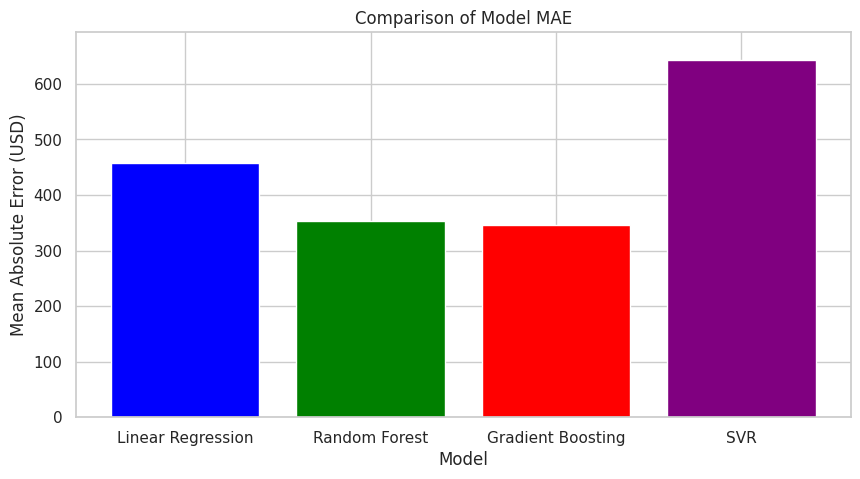

In [ ]:
import matplotlib.pyplot as plt

# Define MAE values from the model evaluations
mae_values = [458.01, 353.91, 346.51, 643.03]  # Corresponding to Linear Regression, Random Forest, Gradient Boosting, and SVR
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR']

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, mae_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (USD)')
plt.title('Comparison of Model MAE')
plt.ylim(0, max(mae_values) + 50)  # Extend y-axis limit for better visualization
plt.show()


**Based on above analysis:**

Evaluate Performance Metrics:

Look at the Mean Absolute Error (MAE) to understand the average deviation of the predicted laptop prices from the actual prices in the same units as the target variable (USD).

Consider the Mean Squared Error (MSE) to assess the quality of the model with a focus on larger errors, as MSE gives more weight to larger deviations due to the squaring of the errors.

Review the R-squared (R²) metric to understand the proportion of variance in laptop prices that is predictable from the features.

Feature Importance Analysis:

Feature importance from the Gradient Boosting model provides insight into which features were the most predictive. Higher importance means the feature had more influence on the model's predictions. Use the .feature_importances_ attribute of my trained model to retrieve the importance scores.

### **According to the above MAE, it is concluded that the Gradient Boosting is the best regression model for predicting the laptop price based on the given variables**

# **Thank You**